In [72]:
import pandas as pd

In [73]:
df = pd.read_csv('Main.csv')

In [74]:
df

,,,,,,,,,,,,,,Main
Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Company,Stock
12/29/2017,170.52,170.59,169.22,169.23,25643711,0,1,170.52,170.59,169.22,169.23,25643711,Apple,AAPL
12/28/2017,171,171.85,170.48,171.08,15997739,0,1,171,171.85,170.48,171.08,15997739,Apple,AAPL
12/27/2017,170.1,170.78,169.71,170.6,21672062,0,1,170.1,170.78,169.71,170.6,21672062,Apple,AAPL
12/26/2017,170.8,171.47,169.679,170.57,32968167,0,1,170.8,171.47,169.679,170.57,32968167,Apple,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/8/2015,212.81,213.7999,210.01,210.615,3442509,0,1,212.81,213.7999,210.01,210.615,3442509,Tesla,TSLA
1/7/2015,213.35,214.78,209.78,210.95,2968390,0,1,213.35,214.78,209.78,210.95,2968390,Tesla,TSLA
1/6/2015,210.06,214.2,204.21,211.28,6261936,0,1,210.06,214.2,204.21,211.28,6261936,Tesla,TSLA
1/5/2015,214.55,216.5,207.1626,210.09,5368477,0,1,214.55,216.5,207.1626,210.09,5368477,Tesla,TSLA


In [75]:
df = pd.read_csv('Main.csv', header=1)  

In [76]:
print("PRICE RANGE ANALYSIS")

PRICE RANGE ANALYSIS


In [77]:
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')

df['Price Range'] = df['High'] - df['Low']

In [79]:
price_range_stats = df['High'] - df['Low']
price_range_mean = price_range_stats.mean()
price_range_median = price_range_stats.median()
price_range_std = price_range_stats.std()

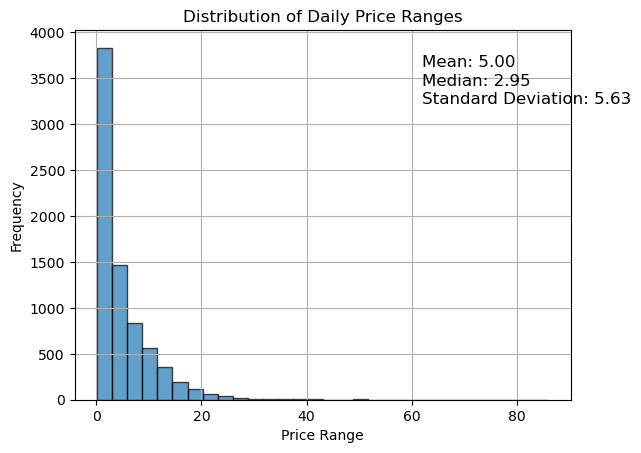

In [80]:
plt.hist(price_range_stats, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Price Ranges')
plt.grid(True)

plt.text(0.7, 0.9, f'Mean: {price_range_mean:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Median: {price_range_median:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.80, f'Standard Deviation: {price_range_std:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show()

In [81]:
print("MOVING AVERAGES")

MOVING AVERAGES


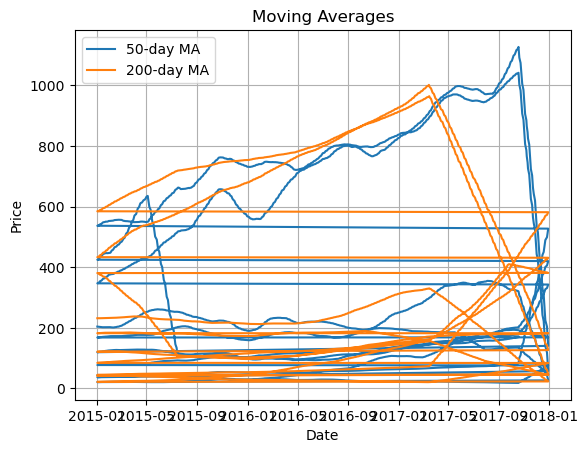

In [86]:
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

plt.plot(df['Date'], df['50-day MA'], label='50-day MA')
plt.plot(df['Date'], df['200-day MA'], label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

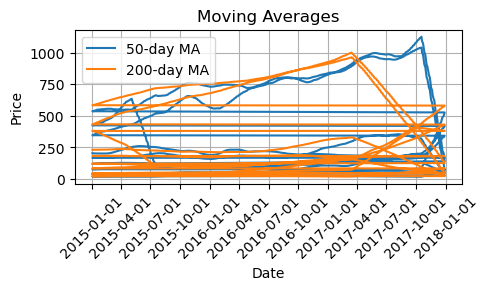

In [99]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a 'Date' column in the format 'YYYY-MM-DD' or any date format.
df['Date'] = pd.to_datetime(df['Date'])

df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(5, 2))  # Adjust the figure size if needed

plt.plot(df['Date'], df['50-day MA'], label='50-day MA')
plt.plot(df['Date'], df['200-day MA'], label='200-day MA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.grid(True)

# Format the x-axis date labels and adjust the interval
date_format = mdates.DateFormatter('%Y-%m-%d')
date_locator = mdates.MonthLocator(interval=3)  # Display labels every 3 months

ax = plt.gca()
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(date_locator)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [84]:
print("SEASONAL PATTERNS")

SEASONAL PATTERNS


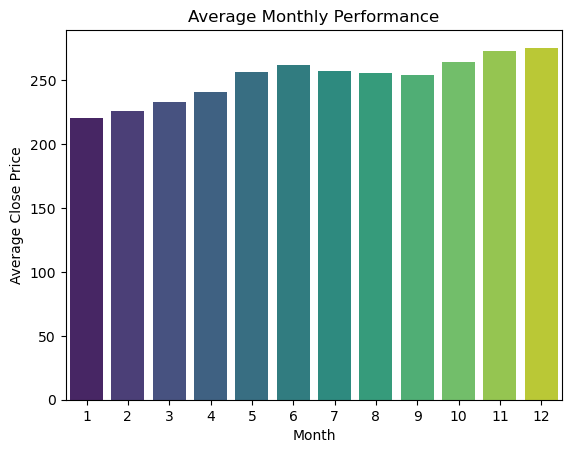

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date']) 
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Close'].mean().reset_index()

sns.barplot(data=monthly_avg, x='Month', y='Close', palette='viridis')
plt.title('Average Monthly Performance')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()
